# Implementation of Gradient Boosting Algorithm
We will use Boston Housing dataset to demonstrate how Gradient Boosting regressor is implemented.

In [1]:
# Import packages and libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.datasets import load_boston
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

# Data Preparation

In [2]:
# Load data - Reading Boston Data
boston = load_boston()
print(type(boston))

<class 'sklearn.utils.Bunch'>


Boston data is a class object, so to call the attribute inside we need to use dot(.)

In [3]:
feature = pd.DataFrame(boston.data, columns=boston.feature_names)
label = pd.Series(boston.target)

Feature are all the independent variables or features thattarget is dependant upon. Label is the dependent variable that we want to predict. 

# Data Description

This data frame contains the following columns:

**crim** - per capita crime rate by town.

**zn** - proportion of residential land zoned for lots over 25,000 sq.ft.

**indus** - proportion of non-retail business acres per town.

**chas** - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

**nox** - nitrogen oxides concentration (parts per 10 million).

**rm** - average number of rooms per dwelling.

**age** - proportion of owner-occupied units built prior to 1940.

**dis** - weighted mean of distances to five Boston employment centres.

**rad** - index of accessibility to radial highways.

**tax** - full-value property-tax rate per $10,000.

**ptratio** - pupil-teacher ratio by town.

**black** - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

**lstat** - lower status of the population (percent).

**medv** - median value of owner-occupied homes in $1000s.

In [4]:
# Have a quick look on target and label
feature.head(10)

CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622  3.0  222.0   
5  0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622  3.0  222.0   
6  0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605  5.0  311.0   
7  0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505  5.0  311.0   
8  0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821  5.0  311.0   
9  0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921  5.0  311.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  
5     18.7  394.12   5.21  
6     15.2  395.60  12.43  
7     15.2  396.90  19.15  
8     15.2  386.63  29.93  
9     15.2  386.71  17.10

In [5]:
label.head(10)

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
5    28.7
6    22.9
7    27.1
8    16.5
9    18.9
dtype: float64

In [6]:
# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size=0.2, random_state = 42) #80% training and 20% test

X_train and y_train = 80% train feature and label <br>
X_test and y_test = 20% test feature and label

* Set `random_state = 42` so that the train test split remains the same and we can validate the results using different parameters.

# Build Gradient Boosting regression tree

In [7]:
gb = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=0)

**max_depth** = Maximum depth of the individual regression estimators. <br>
**n_estimators** = The number of boosting stages to perform. <br>
**learning_rate** = Learning rate shrinks the contribution of each tree.

In [8]:
# Train gradient boost regressor model
mod = gb.fit(X_train, y_train)

# Predict test set
y_pred = mod.predict(X_test)

In [9]:
r2_score(y_test, y_pred)

0.7053855703207521

In [10]:
pred = pd.Series(y_pred).round(1)
test = pd.Series(y_test).reset_index(drop=True)

In [11]:
comp_data = {'Pred':pred, 'Test':test}
comp = pd.DataFrame(comp_data)
comp

Pred  Test
0    22.9  23.6
1    26.6  32.4
2    14.4  13.6
3    22.9  22.8
4    14.4  16.1
..    ...   ...
97    9.4  17.9
98   14.4   9.6
99   14.4  17.2
100  22.9  22.5
101  22.9  21.4

[102 rows x 2 columns]

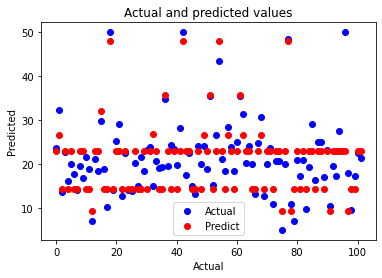

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots()
ax.scatter(x=range(0, len(comp)), y=comp['Test'], c='blue', label='Actual')
ax.scatter(x=range(0, len(comp)), y=comp['Pred'], c='red', label='Predict')

plt.title('Actual and predicted values')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()

It seems like the predicted values are quite consistent (on same line), resulting in lower accuracy. Let's tune to improve the model!

# Feature Importance

In [13]:
# Plot feature importance
feature_importance = mod.feature_importances_ # unsorted array
idx = np.argsort(-feature_importance) # get sorted array indices in descending order (start with biggest value)

# Create dataframe with feature and score using the sorted indices
df_imp = pd.DataFrame(dict(Features=feature.columns[idx],
                           Scores=feature_importance[idx]))

Text(0.5, 1.0, 'Variable Importance')

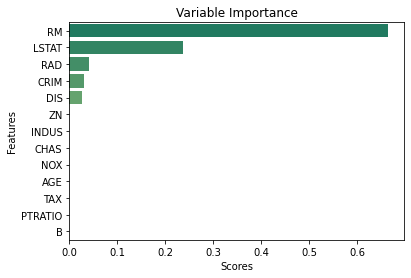

In [14]:
import seaborn as sns
ax = plt.subplots()
ax = sns.barplot(x='Scores', y='Features', data=df_imp, palette='summer')
ax.set_title('Variable Importance')

We can also see which features are important in predicting the label.

# Hyperparameters tuning

In [15]:
from sklearn.model_selection import GridSearchCV
param = {'learning_rate':[0.05, 0.1, 0.3, 0.5, 0.7, 0.9], 
        'n_estimators':[20, 40, 60, 80, 100, 120],
        'max_depth': [1,2,3,4,5]}
tuning = GridSearchCV(estimator=GradientBoostingRegressor(random_state=0),
                     param_grid=param, scoring='r2')
tuning.fit(X_train, y_train)
tuning.best_params_, tuning.best_score_

({'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100},
 0.8499984948232064)

GridSearchCV is a method that helps find the optimal value for our ML algorithm to derive the best results. From the hyperparamter tuning, the best parameter for `learning_rate` is **0.1**, `max_depth` is **3**, and `n_estimators` is **100**, the final `r2` is **85%** which is higher than the tree we built initially.

# Comparing different algorithms
## Decision Tree
Next, I try to use Decision Tree regression and see how the result is different from Gradient Boosting regressor. Also, I will plot the tree to show how the tree split. <br>

To use the visualization, install the package: <br>
* For Windows, open **command** <br>
* For MacOS, open **terminal** <br>

Then, type in these: <br>
**FOR CONDA ENVIRONMENT**
1. `conda install pydotplus` 
2. `conda install graphviz` 
3. `conda install python-grahviz`


**ELSE**
1. `pip3 install pydotplus` (for Python version 3 and above)
2.  `pip3 install graphviz` (for Python version 3 and above)
3.  `pip3 install python-graphviz` (for Python version 3 and above)


In [26]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=0)
dt_mod = dt.fit(X_train, y_train)
dt_pred = dt_mod.predict(X_test)

In [27]:
dt_score = r2_score(y_test, dt_pred)
dt_score

0.862408597996961

## Visualization in Jupyter

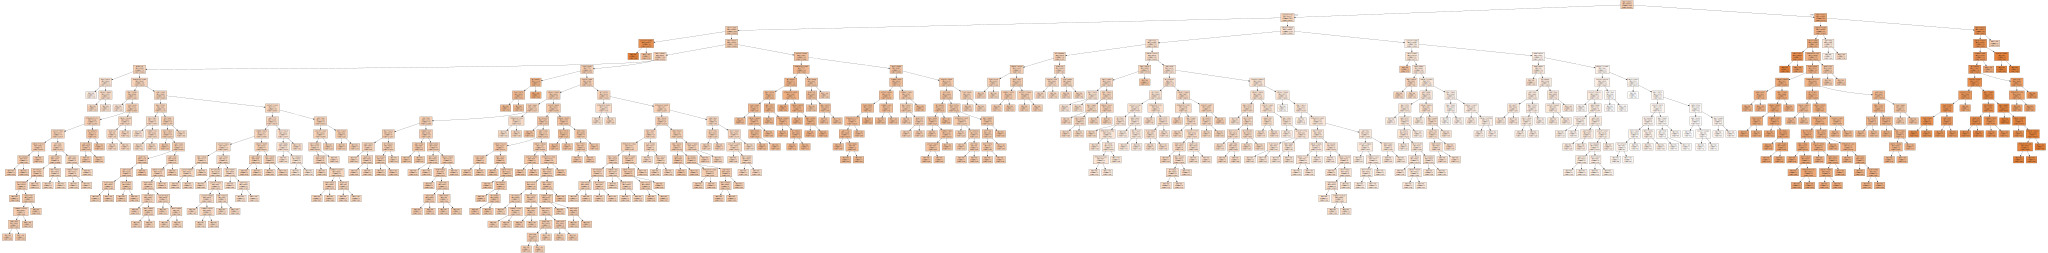

In [29]:
from sklearn import tree
from sklearn.tree import export_graphviz
from graphviz import Source
from IPython.display import SVG
dt_graph = Source(tree.export_graphviz(dt,
                                       out_file=None,
                                       feature_names=feature.columns.values,
                                       impurity=True,
                                       filled=True))
SVG(dt_graph.pipe(format='svg'))

## Save viz as pdf and png

In [30]:
import pydotplus
from IPython.display import Image
dot_data = tree.export_graphviz(dt,
                                out_file=None,
                                feature_names=feature.columns.values,
                                filled=True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

In [31]:
# Create pdf
graph.write_pdf("boston.pdf")

# Create png
graph.write_png("boston.png")

True

## Random Forest
Random Forest basically combines many Decision Trees and take average of the trees' results. Hence, technically is should be better than a single Decision tree. Now let's see how Random Forest regressor performs.

In [32]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0)
rf_mod = rf.fit(X_train, y_train)
rf_pred = rf_mod.predict(X_test)

In [33]:
rf_score = r2_score(y_test, rf_pred)
rf_score

0.873390709910713

As we inferred, it shows a better result than a single Decision Tree.

Up to this point, have you realize anything? <br>
Yes! Both Decision Tree and Random Forest regressor has better results than our Gradient Boosting regressor:- <br>
* GB = 71%
* DT = 87%
* RF = 88% <br>

Why is this happening? Well, because my initial Gradient Boosting regressor has a limited parameter. Now let's use the default parameter and see how it performs.

In [34]:
grb = GradientBoostingRegressor(random_state=0)
grb_mod = grb.fit(X_train, y_train)
grb_pred = grb_mod.predict(X_test)

In [35]:
grb_score = r2_score(y_test, grb_pred)
grb_score

0.9157722416843829

The result is much better, indicates that Gradient Boosting regressor outperform both Decision Tree and Random Forest regressor.

# Visualizing different algorithm performance

Text(0.5, 1.0, 'R2 score of different algorithms')

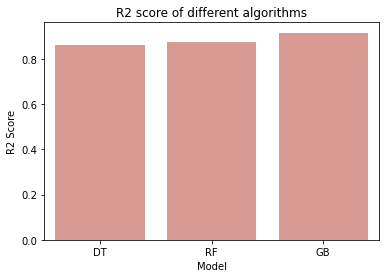

In [36]:
mod_data = {'Model':['DT', 'RF', 'GB'],
            'R2 Score':[dt_score, rf_score, grb_score]}
mod_df = pd.DataFrame(mod_data)
ax = plt.subplots()
ax = sns.barplot('Model', y='R2 Score', data=mod_df, color='Salmon', saturation=.5)
ax.set_title('R2 score of different algorithms')